# Dados Brutos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df= pd.read_csv('/content/State_of_data_2022.csv', sep = ',')

In [6]:
# Separando por partes
parte_1 = df.filter(like = 'P1', axis = 1)
parte_2 = df.filter(like = 'P2', axis = 1)
parte_3 = df.filter(like = 'P3', axis = 1)
parte_4 = df.filter(like = 'P4', axis = 1)
parte_5 = df.filter(like = 'P5', axis = 1)
parte_6 = df.filter(like = 'P6', axis = 1)
parte_7 = df.filter(like = 'P7', axis = 1)
parte_8 = df.filter(like = 'P8', axis = 1)

# Parte 2 - Situação de trabalho

In [7]:
series_salarios = parte_2.groupby("('P2_h ', 'Faixa salarial')")["('P2_h ', 'Faixa salarial')"].count()

Text(0.5, 1.0, 'Salário mensal em reais')

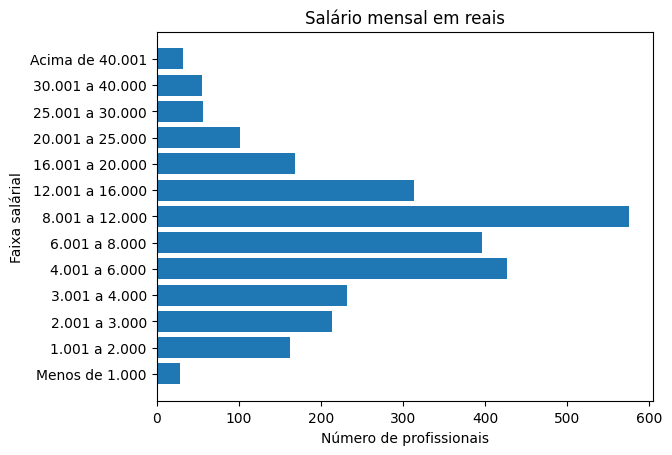

In [8]:
series_salarios = parte_2.groupby("('P2_h ', 'Faixa salarial')")["('P2_h ', 'Faixa salarial')"].count()
faixas_ordenadas = ['Menos de R$ 1.000/mês',
                    'de R$ 1.001/mês a R$ 2.000/mês',
                    'de R$ 2.001/mês a R$ 3.000/mês',
                    'de R$ 3.001/mês a R$ 4.000/mês',
                    'de R$ 4.001/mês a R$ 6.000/mês',
                    'de R$ 6.001/mês a R$ 8.000/mês',
                    'de R$ 8.001/mês a R$ 12.000/mês',
                    'de R$ 12.001/mês a R$ 16.000/mês',
                    'de R$ 16.001/mês a R$ 20.000/mês',
                    'de R$ 20.001/mês a R$ 25.000/mês',
                    'de R$ 25.001/mês a R$ 30.000/mês',
                    'de R$ 30.001/mês a R$ 40.000/mês',
                    'Acima de R$ 40.001/mês'
                    ]

labels = ['Menos de 1.000',
          '1.001 a 2.000',
          '2.001 a 3.000',
          '3.001 a 4.000',
          '4.001 a 6.000',
          '6.001 a 8.000',
          '8.001 a 12.000',
          '12.001 a 16.000',
          '16.001 a 20.000',
          '20.001 a 25.000',
          '25.001 a 30.000',
          '30.001 a 40.000',
          'Acima de 40.001']

series_salarios_reordenadas = series_salarios[faixas_ordenadas]
plt.barh(labels, series_salarios_reordenadas.values)
plt.xlabel('Número de profissionais')
plt.ylabel('Faixa salárial')
plt.title('Salário mensal em reais')

Ao analisar o gráfico, percebemos que muitos profissionais na área têm salários mais altos do que a média no Brasil, que foi cerca de R$ 2.449 em 2021, de acordo com a Pnad. Isso sugere que os profissionais de dados estão sendo bem remunerados em comparação com outros setores. Isso pode ser devido à demanda por suas habilidades especializadas e à importância crescente dos dados em várias indústrias.

Text(0.5, 0, 'Frequência')

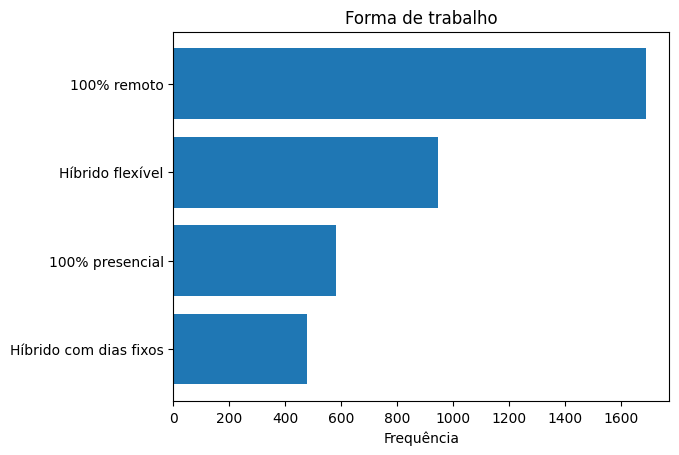

In [7]:
index = ['Híbrido com dias fixos', '100% presencial', 'Híbrido flexível', '100% remoto']
values = df.groupby("('P2_p ', 'Atualmente qual a sua forma de trabalho?')")["('P2_p ', 'Atualmente qual a sua forma de trabalho?')"].count().sort_values(ascending=True).values

plt.barh(index, values)
plt.title('Forma de trabalho')
plt.xlabel('Número de profissionais')

Adicionalmente, destaca-se a marcada predominância do trabalho remoto, tanto no formato completamente remoto quanto no modelo híbrido. No setor de Tecnologia da Informação, observa-se uma tendência crescente em relação ao trabalho remoto, impulsionada ainda mais pela influência da pandemia. Esta análise constata que a área de dados segue essa tendência, mantendo-se alinhada com as evoluções do setor.

Depois de verificar o comportamento salarial geral dos profissionais de dados, iremos estratificar essa informação em diferentes categorias. São elas: Gênero, Etnia, PCD, cargo e tempo de trabalho. A pergunta que queremos responder é: **a faixa salarial entre esses diferentes grupos é homogênea? Como estão distribuídas as faixas salariais entre esses grupos?**

# Análise Salarial por Gênero

Como as faixas salarias são valores categóricos do tipo "object", as análises possíveis com esse tipo de dado estão relacionadas com contagem.

In [19]:
df["('P2_h ', 'Faixa salarial')"].info() #Verificando que tipo de dado é a coluna faixa salarial.

<class 'pandas.core.series.Series'>
RangeIndex: 3185 entries, 0 to 3184
Series name: ('P2_h ', 'Faixa salarial')
Non-Null Count  Dtype 
--------------  ----- 
2762 non-null   object
dtypes: object(1)
memory usage: 25.0+ KB


In [55]:
df_genero_salarios = df.filter(items=["('P1_b ', 'Genero')","('P2_h ', 'Faixa salarial')"]) # Primeiramente, para cada grupo de análise, fizemos um subset do dataframe original para obter a coluna específica do grupo de análise e a faixa salarial
df_genero_salarios.dropna()
df_genero_salarios["('P1_b ', 'Genero')"].value_counts()

Masculino               2378
Feminino                 795
Prefiro não informar       6
Name: ('P1_b ', 'Genero'), dtype: int64

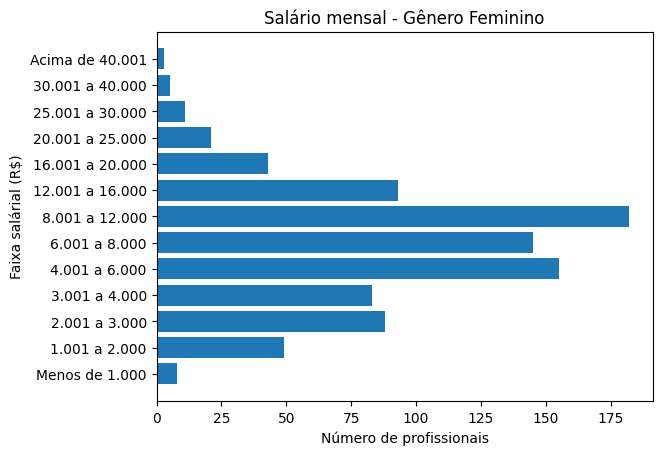

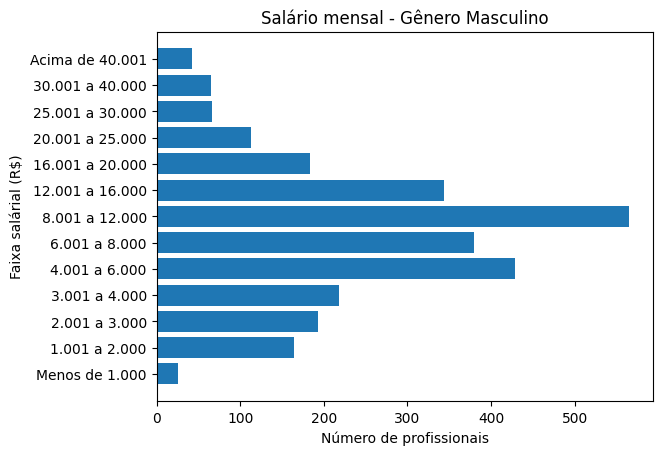

In [323]:
# Realizando um looping para gerar gráficos para cada gênero

lista_genero = ['Feminino', 'Masculino']

for genero in lista_genero:
  df_genero_salarios_grouped = df_genero_salarios[df_genero_salarios["('P1_b ', 'Genero')"] == genero].groupby("('P2_h ', 'Faixa salarial')").count() # Agrupando por

  df_genero_salarios_grouped = df_genero_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_genero_salarios_grouped["('P1_b ', 'Genero')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial (R$)')
  plt.title(f'Salário mensal - Gênero {genero}')
  plt.show()

In [45]:
genero_matrix = (df_genero_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P1_b ', 'Genero')"].value_counts().unstack().fillna(0))
df_hm_genero = pd.DataFrame(genero_matrix , index = faixas_ordenadas,
                  columns = ['Feminino','Masculino'])

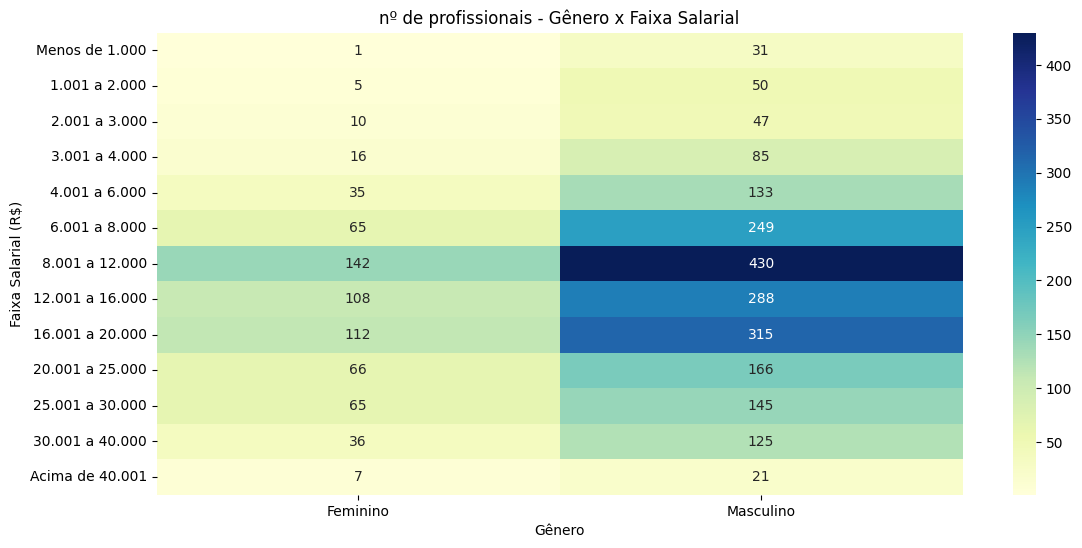

In [92]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_genero.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels)

plt.title('nº de profissionais - Gênero x Faixa Salarial')
plt.xlabel('Gênero')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

In [48]:
genero_matrix_p = genero_matrix.copy()

genero_matrix_p['Feminino'] = genero_matrix_p['Feminino']*100/df_genero_salarios["('P1_b ', 'Genero')"].value_counts()['Feminino']
genero_matrix_p['Masculino'] = genero_matrix_p['Masculino']*100/df_genero_salarios["('P1_b ', 'Genero')"].value_counts()['Masculino']


df_hm_genero_p = pd.DataFrame(genero_matrix_p , index = faixas_ordenadas,
                  columns = ['Feminino','Masculino'])

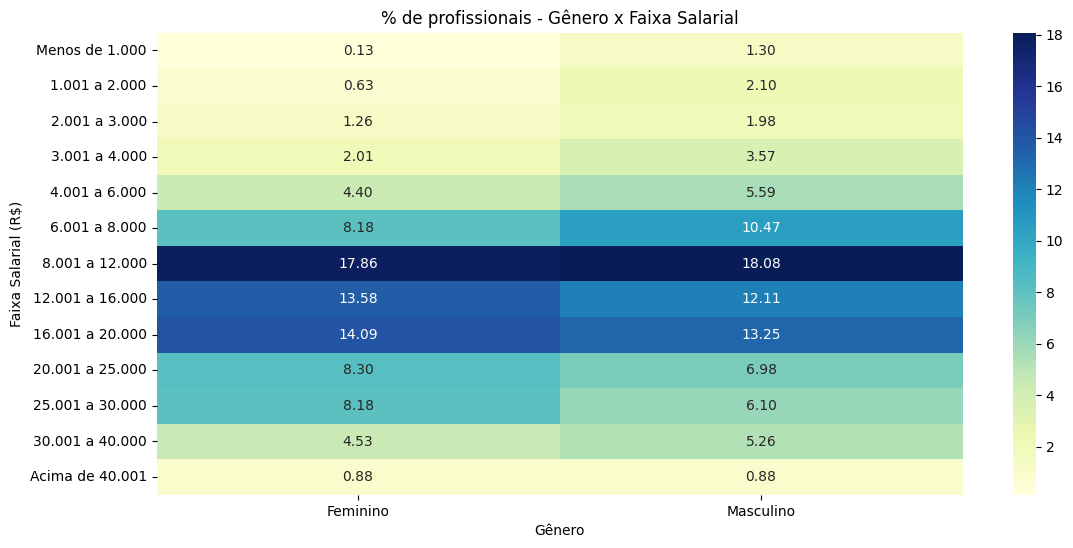

In [51]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_genero_p.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.2f', yticklabels = labels)

# plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])

plt.title('% de profissionais - Gênero x Faixa Salarial')
plt.xlabel('Gênero')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

Observando o heatmap, é possível observar que no gênero feminino, dentre as 795 pessoas que responderam a pesquisa 142 (17,86%) ganham na faixa de R\$8001 - R\$12000. De forma similar, 18.08% das pessoas do gênero masculino (430 pessoas) ganham nesta mesma faixa, sendo ela a faixa de maior ocorrência entre os gêneros.  

# Análise Salarial por Etnia/Cor/Raça

Como estão distribuídas as faixas salariais por etnia?

In [84]:
df_etnia_salarios = df.filter(items=[ "('P1_c ', 'Cor/raca/etnia')","('P2_h ', 'Faixa salarial')"])
df_etnia_salarios.dropna()
df_etnia_salarios["('P1_c ', 'Cor/raca/etnia')"].value_counts()

Branca                  2025
Parda                    807
Preta                    212
Amarela                   97
Prefiro não informar      23
Outra                     13
Indígena                   8
Name: ('P1_c ', 'Cor/raca/etnia'), dtype: int64

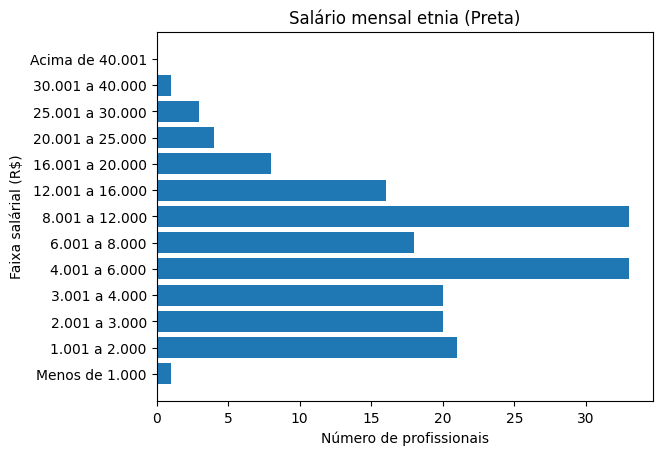

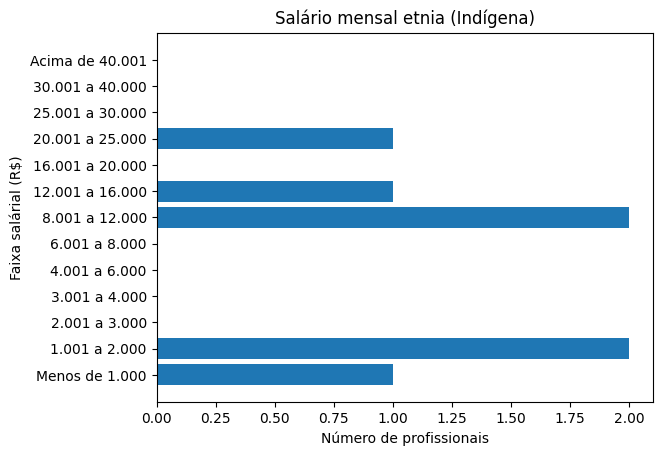

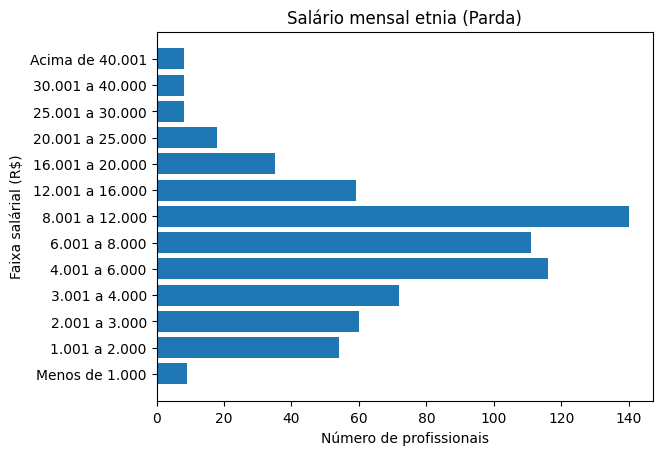

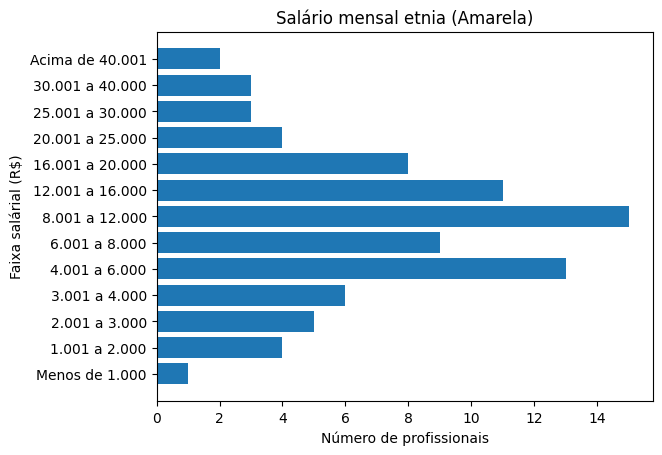

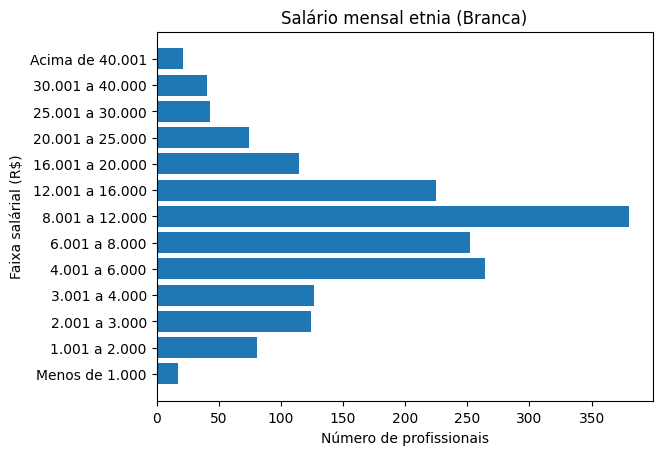

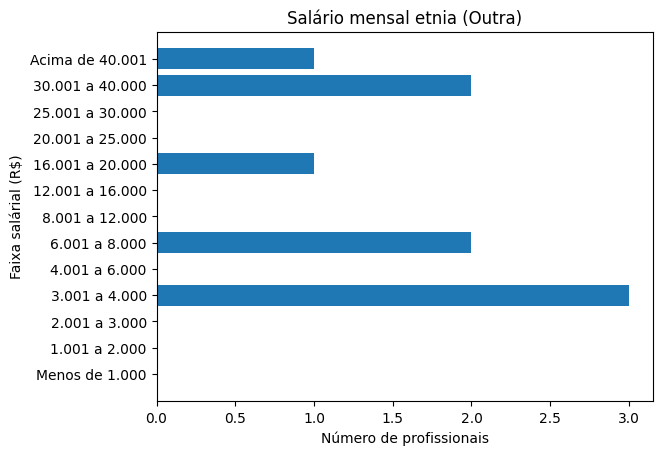

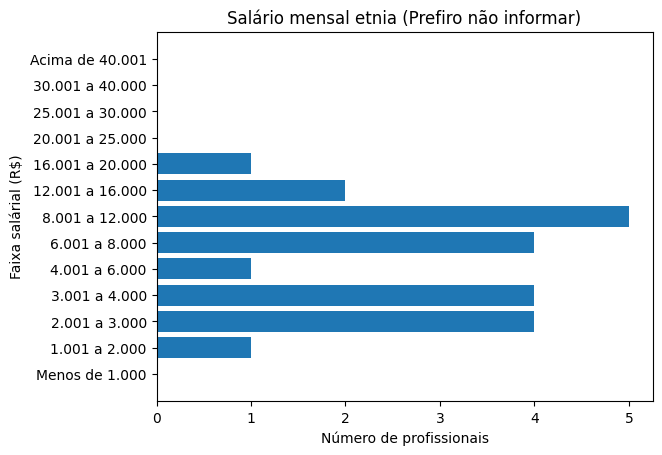

In [85]:
# Realizando um looping para gerar gráficos para cada etnia
lista_etnias = ['Preta','Indígena','Parda','Amarela','Branca', 'Outra', 'Prefiro não informar']

for etnia in lista_etnias:
  df_etnia_salarios_grouped = df_etnia_salarios[df_etnia_salarios["('P1_c ', 'Cor/raca/etnia')"] == etnia].groupby("('P2_h ', 'Faixa salarial')").count()

  df_etnia_salarios_grouped = df_etnia_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial (R$)')
  plt.title(f'Salário mensal etnia ({etnia})')
  plt.show()


In [61]:
etnia_matrix = (df_etnia_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P1_c ', 'Cor/raca/etnia')"].value_counts().unstack().fillna(0))
df_hm_etnia = pd.DataFrame(etnia_matrix, index = faixas_ordenadas,
                  columns = lista_etnias)

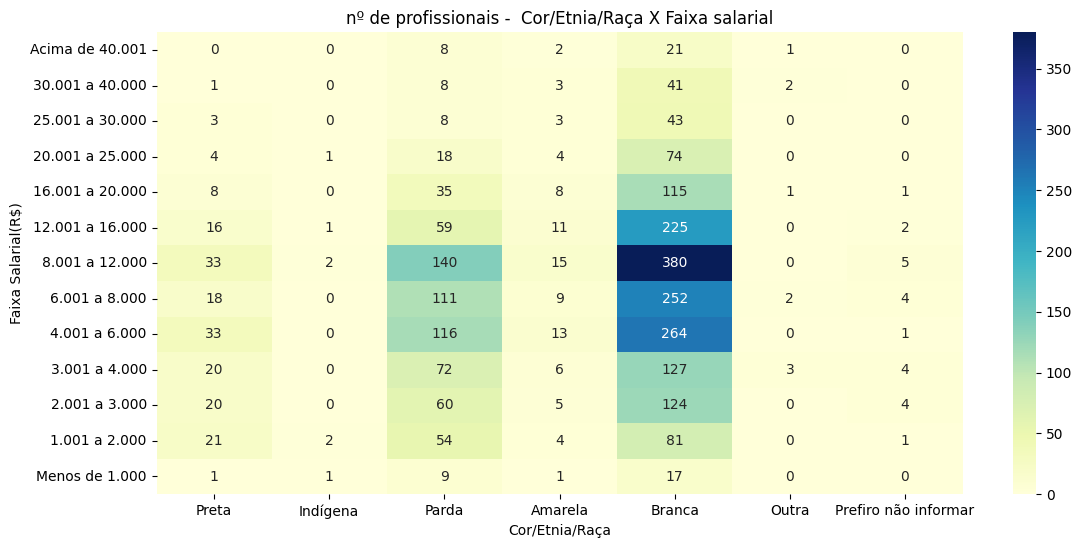

In [87]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_etnia.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f',yticklabels = labels[::-1])

# plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])

plt.title('nº de profissionais -  Cor/Etnia/Raça X Faixa salarial')
plt.xlabel('Cor/Etnia/Raça')
plt.ylabel('Faixa Salarial(R$)')
plt.show()

In [88]:
etnia_matrix_p = etnia_matrix.copy()

for etnia in lista_etnias:

  etnia_matrix_p[etnia] = etnia_matrix_p[etnia]*100/df_etnia_salarios["('P1_c ', 'Cor/raca/etnia')"].value_counts()[etnia]

df_hm_etnia_p = pd.DataFrame(etnia_matrix_p , index = faixas_ordenadas,
                  columns = lista_etnias)

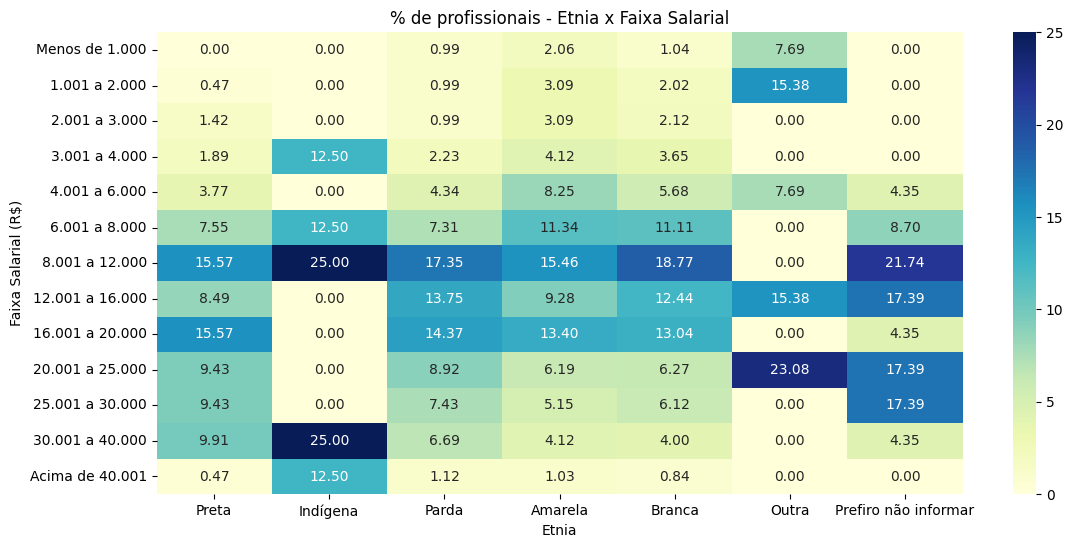

In [89]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_etnia_p.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.2f', yticklabels = labels)

plt.title('% de profissionais - Etnia x Faixa Salarial')
plt.xlabel('Etnia')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

# Análise Salarial de PCD

In [99]:
# Realizando um filtro do dataframe apenas com as colunas de genero e faixa salarial
df_pcd_salarios = df.filter(items=["('P1_d ', 'PCD')","('P2_h ', 'Faixa salarial')"])
df_pcd_salarios["('P1_d ', 'PCD')"].value_counts()

Não                     3131
Sim                       39
Prefiro não informar      15
Name: ('P1_d ', 'PCD'), dtype: int64

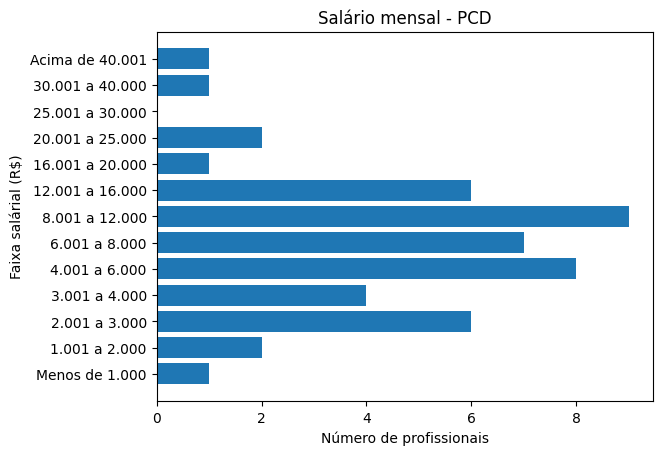

In [299]:
df_pcd_salarios_grouped = df_pcd_salarios[df_pcd_salarios["('P1_d ', 'PCD')"] == 'Sim'].groupby("('P2_h ', 'Faixa salarial')").count()

df_pcd_salarios_grouped = df_pcd_salarios_grouped.reindex(faixas_ordenadas).fillna(0)


plt.barh(labels, df_pcd_salarios_grouped["('P1_d ', 'PCD')"][faixas_ordenadas])
plt.xlabel('Número de profissionais')
plt.ylabel('Faixa salárial (R$)')
plt.title(f'Salário mensal - PCD')
plt.show()

# Análise Salarial por Cargo Ocupado

In [91]:
df_cargos_salarios = df.filter(items=["('P2_f ', 'Cargo Atual')","('P2_h ', 'Faixa salarial')"])
df_cargos_salarios.dropna()
len(df_cargos_salarios["('P2_f ', 'Cargo Atual')"])

3185

In [71]:
lista_cargos = ['DBA/Administrador de Banco de Dados', 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas',
       'Cientista de Dados/Data Scientist', 'Professor',
       'Analista de BI/BI Analyst',
       'Analista de Inteligência de Mercado/Market Intelligence',
       'Analista de Negócios/Business Analyst',
       'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
       'Analista de Dados/Data Analyst',
       'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)',
       'Outra Opção', 'Analista de Suporte/Analista Técnico',
       'Engenheiro de Machine Learning/ML Engineer', 'Analytics Engineer',
       'Analista de Marketing', 'Outras Engenharias (não inclui dev)',
       'Estatístico', 'Economista']
lista_cargos.sort()

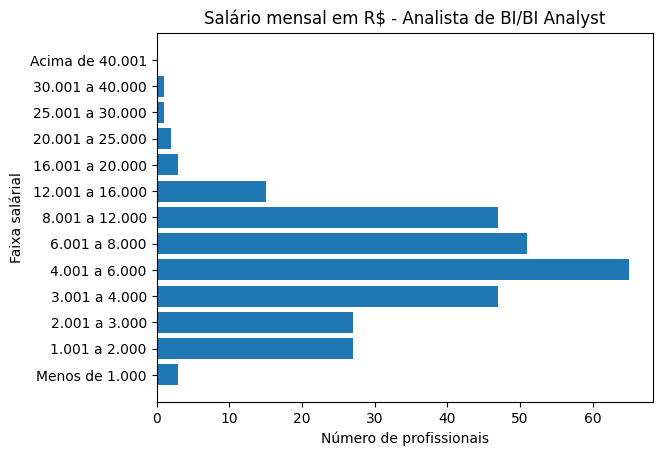

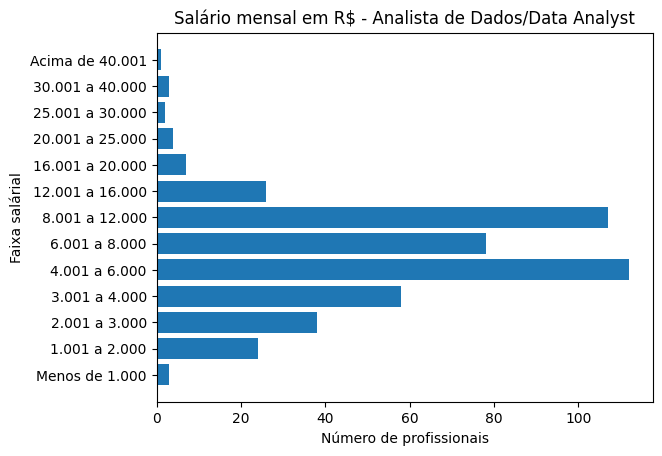

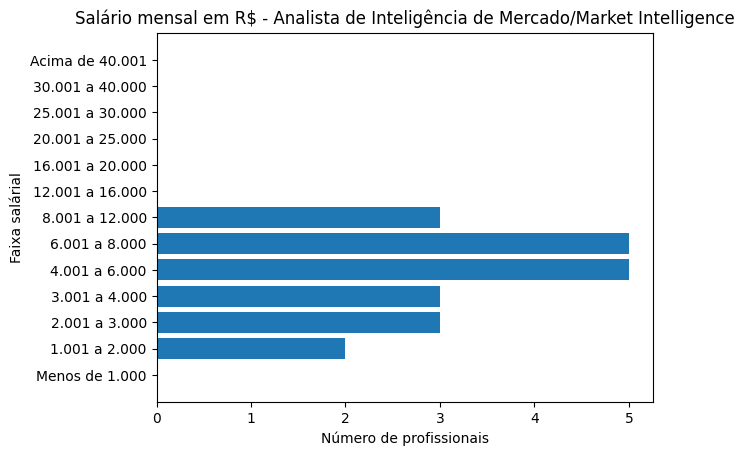

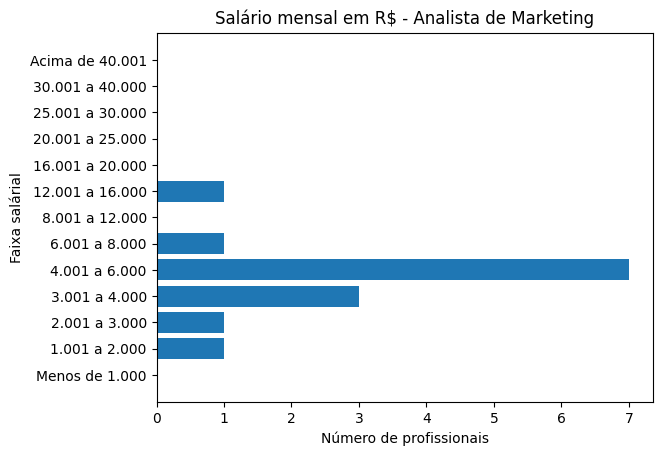

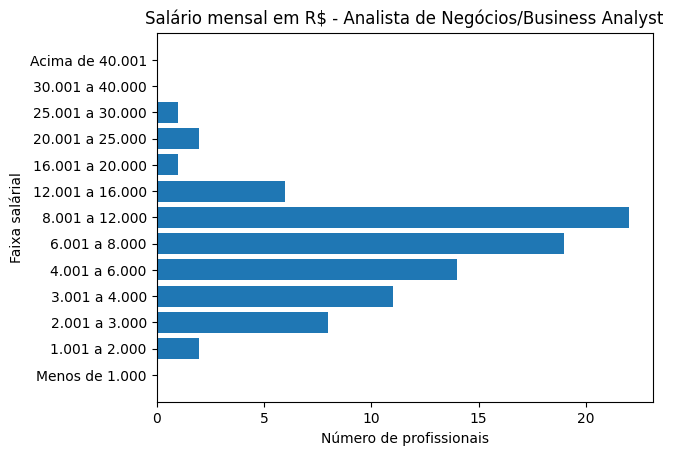

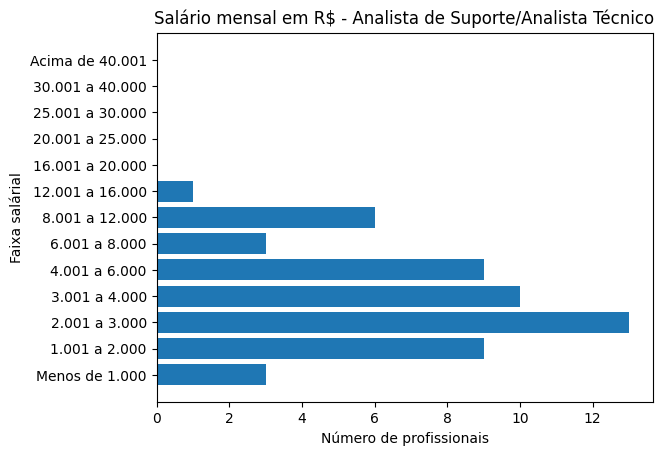

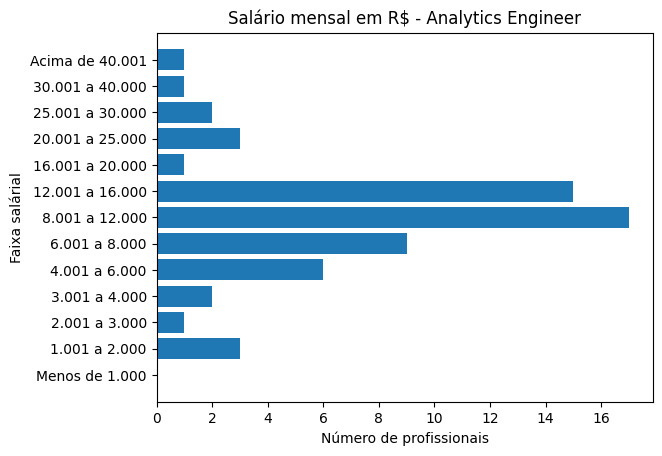

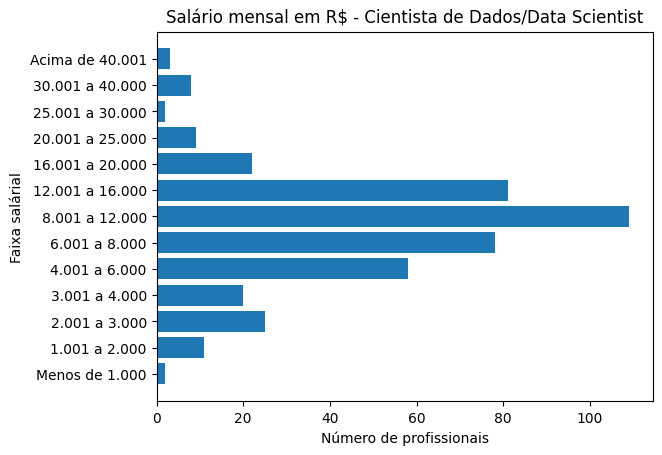

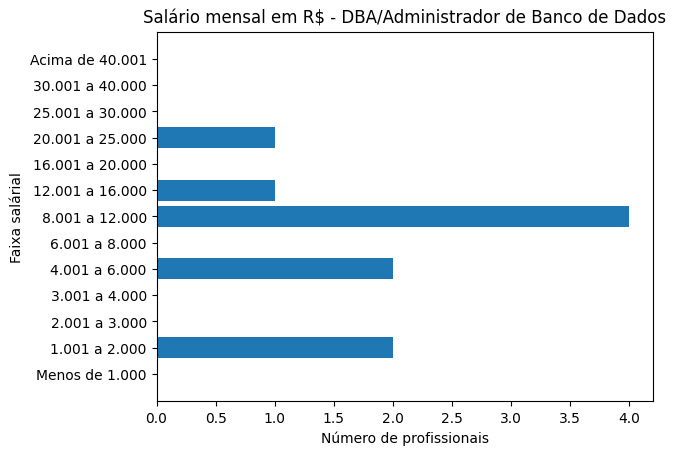

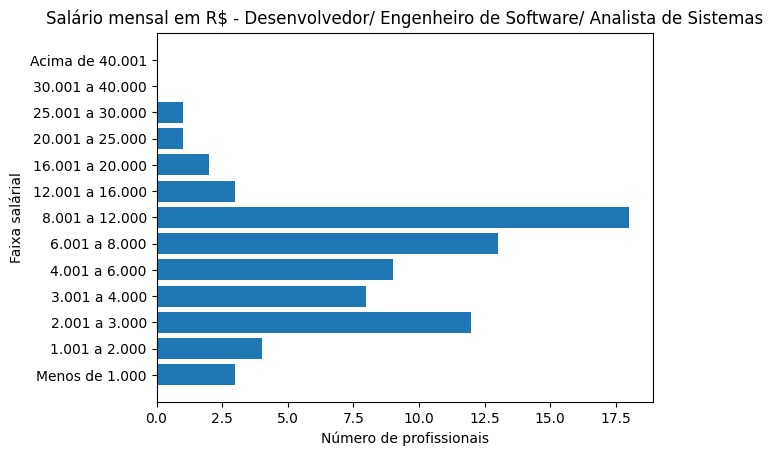

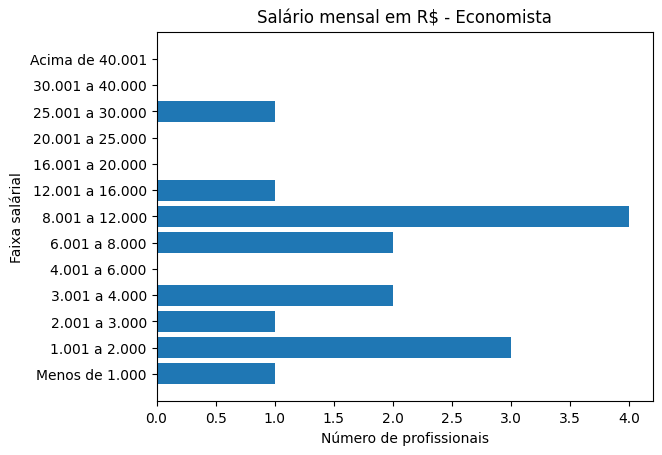

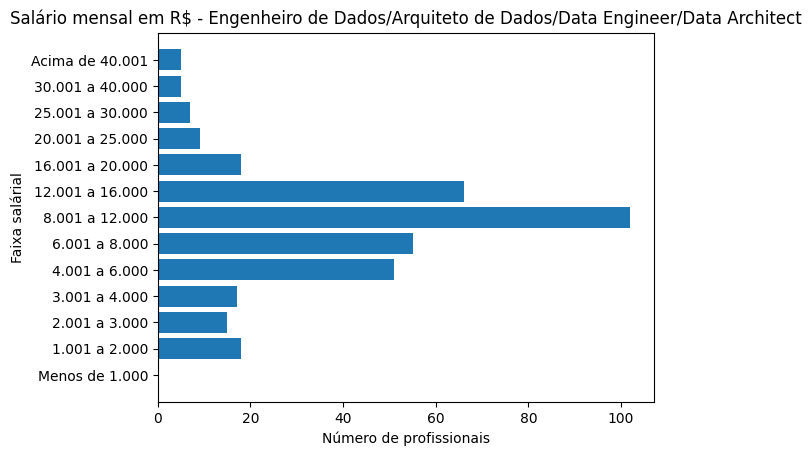

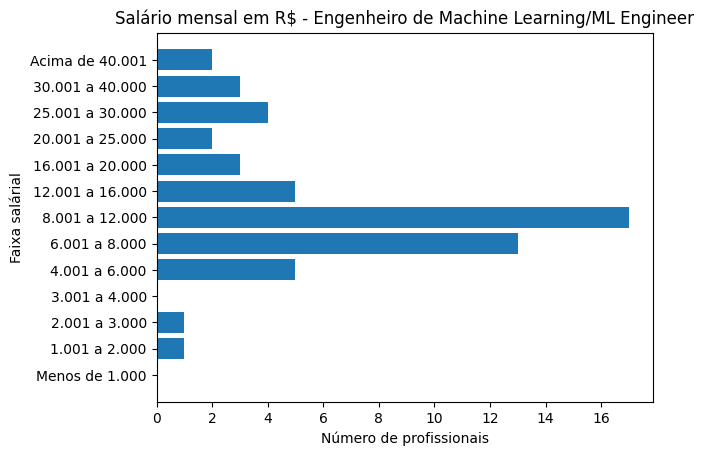

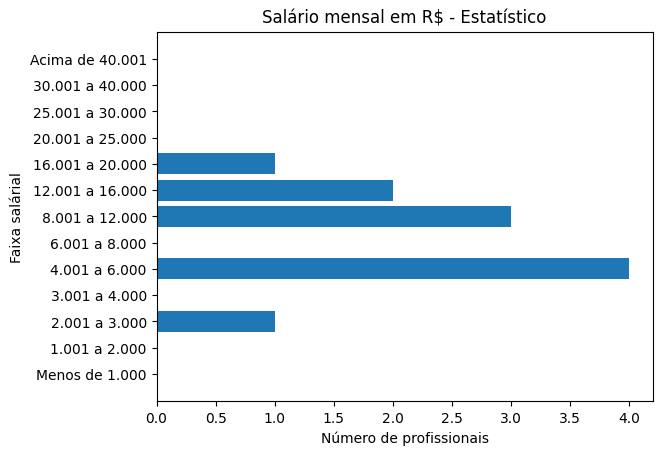

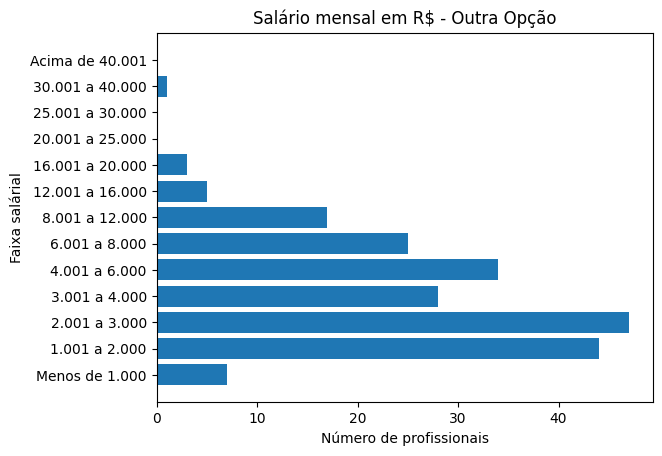

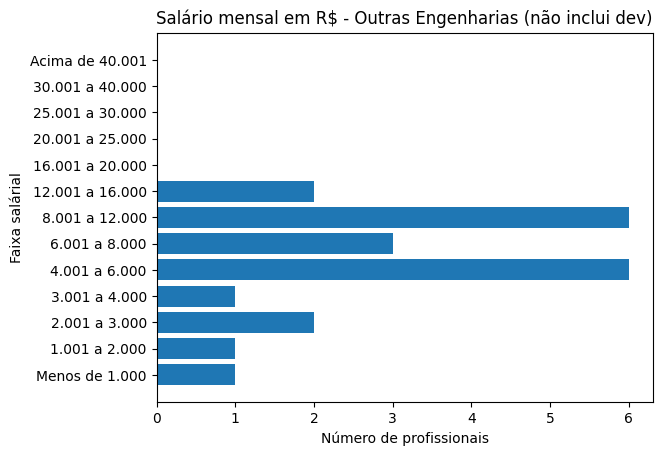

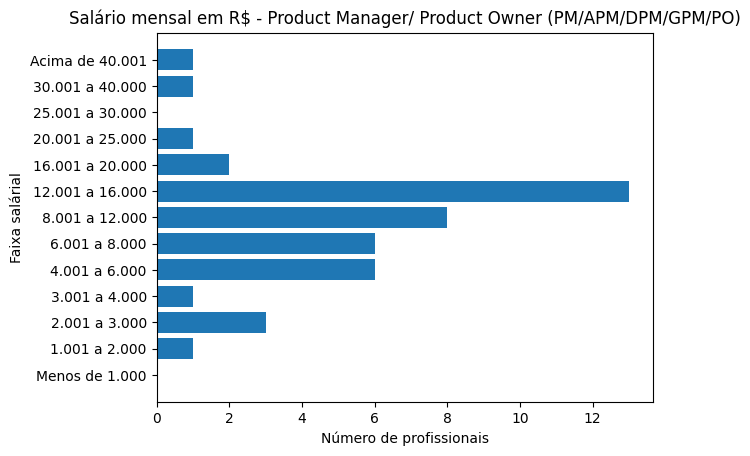

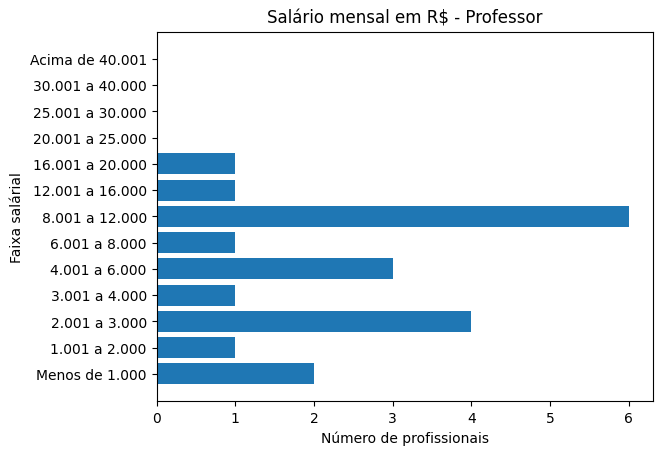

In [13]:
# Realizando um looping para gerar gráficos para cada cargo
for cargo in lista_cargos:
  df_cargos_salarios_grouped = df_cargos_salarios[df_cargos_salarios["('P2_f ', 'Cargo Atual')"] == cargo].groupby("('P2_h ', 'Faixa salarial')").count()

  df_cargos_salarios_grouped = df_cargos_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_cargos_salarios_grouped["('P2_f ', 'Cargo Atual')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial')
  plt.title(f'Salário mensal em R$ - {cargo}')
  plt.show()

In [67]:
cargos_matrix = (df_cargos_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P2_f ', 'Cargo Atual')"].value_counts().unstack().fillna(0))
df_hm_cargos = pd.DataFrame(cargos_matrix, index = faixas_ordenadas,
                  columns = lista_cargos)

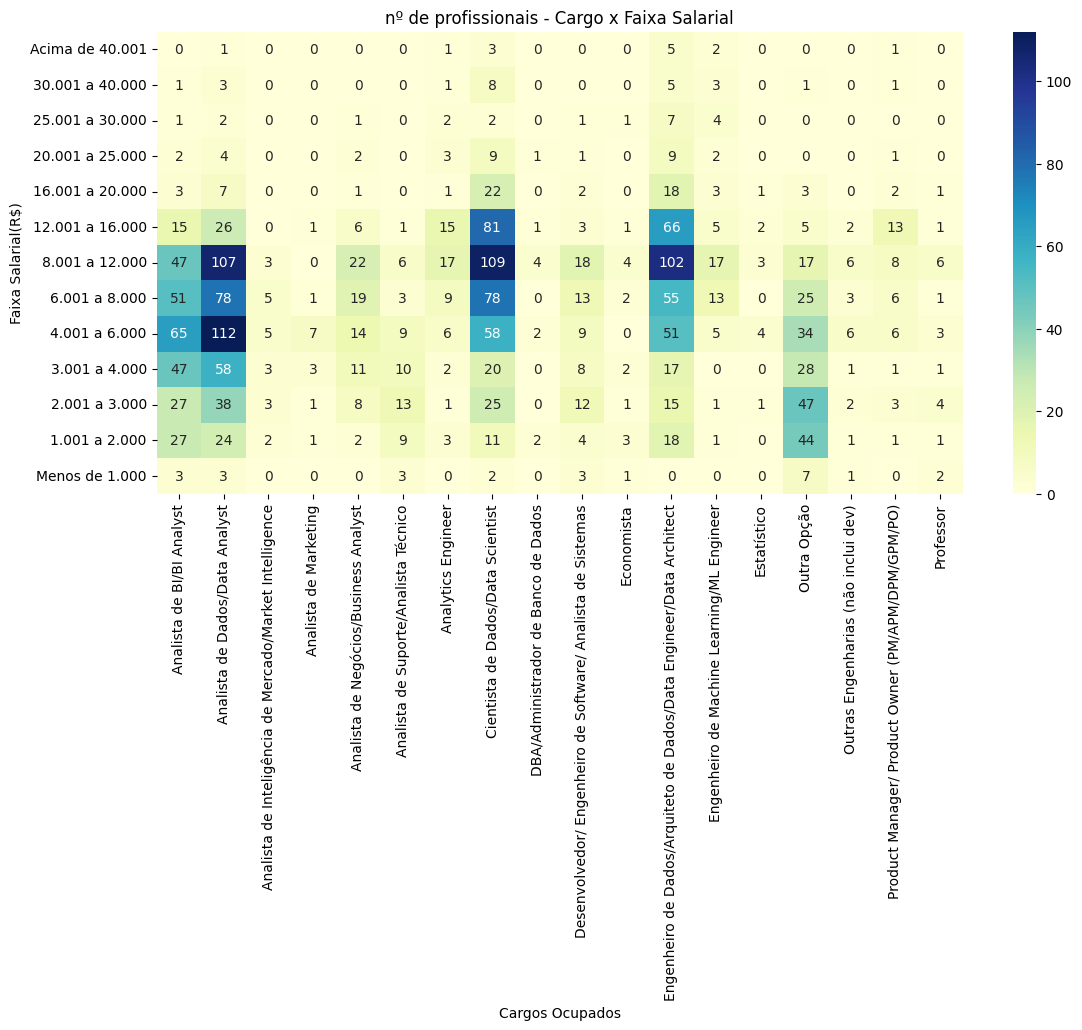

In [68]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_cargos.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels[::-1])

# plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])

plt.title('nº de profissionais - Cargo x Faixa Salarial')
plt.xlabel('Cargos Ocupados')
plt.ylabel('Faixa Salarial(R$)')
plt.show()

In [74]:
cargos_matrix_p = cargos_matrix.copy()

for cargo in lista_cargos:

  cargos_matrix_p[cargo] = cargos_matrix_p[cargo]*100/df_cargos_salarios["('P2_f ', 'Cargo Atual')"].value_counts()[cargo]

df_hm_cargos_p = pd.DataFrame(cargos_matrix_p , index = faixas_ordenadas,
                  columns = lista_cargos)

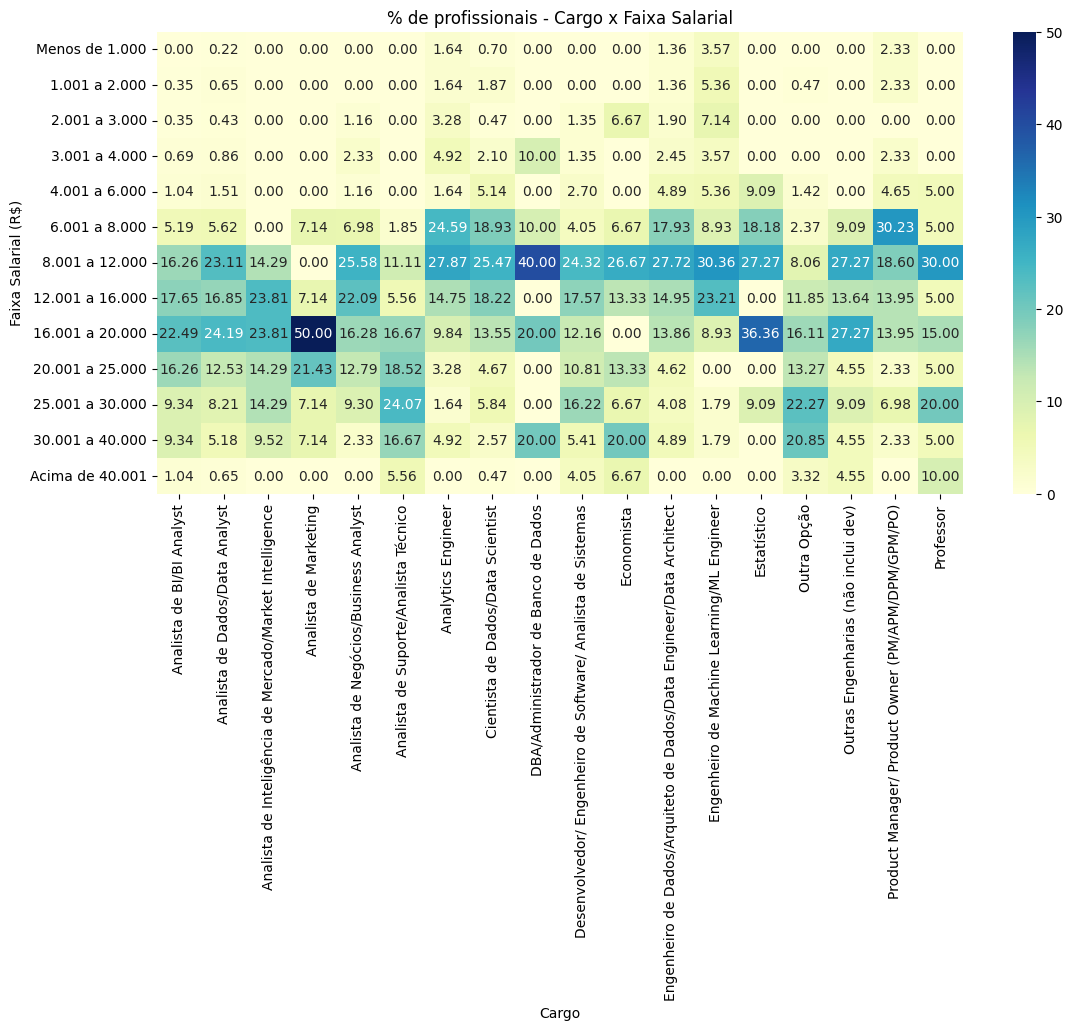

In [98]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_cargos_p.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.2f', yticklabels = labels)

plt.title('% de profissionais - Cargo x Faixa Salarial')
plt.xlabel('Cargo')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

# Análise Salarial por Tempo de Carreira

In [76]:
df_tempo_carreira_salarios = df.filter(items=["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_h ', 'Faixa salarial')"])
df_tempo_carreira_salarios.dropna()
df_tempo_carreira_salarios["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts()


de 1 a 2 anos                             732
de 3 a 4 anos                             521
Menos de 1 ano                            438
de 4 a 6 anos                             392
Mais de 10 anos                           301
de 7 a 10 anos                            223
Não tenho experiência na área de dados    155
Name: ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?'), dtype: int64

In [77]:
lista_tempo_carreira = ['Menos de 1 ano', 'de 1 a 2 anos', 'de 3 a 4 anos', 'de 4 a 6 anos', 'de 7 a 10 anos',
       'Mais de 10 anos']

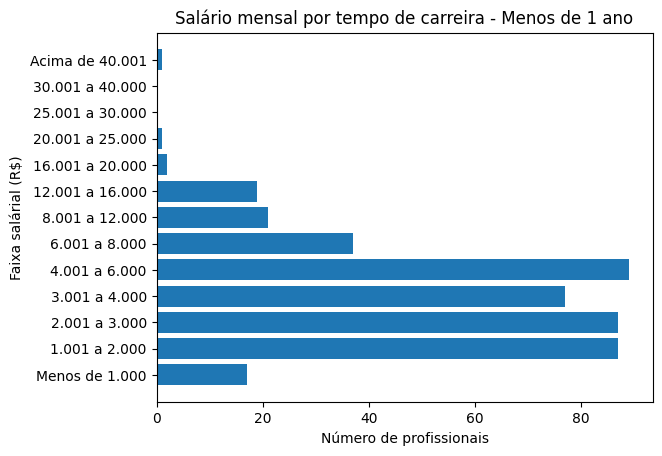

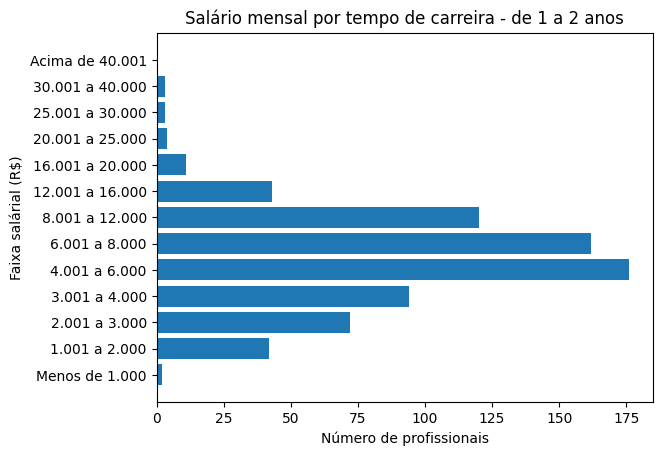

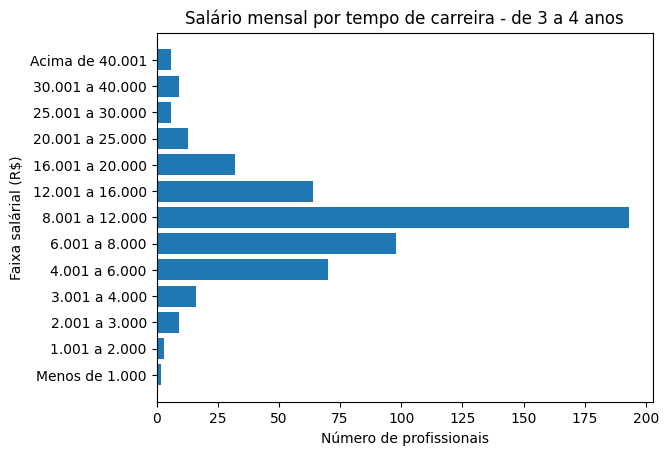

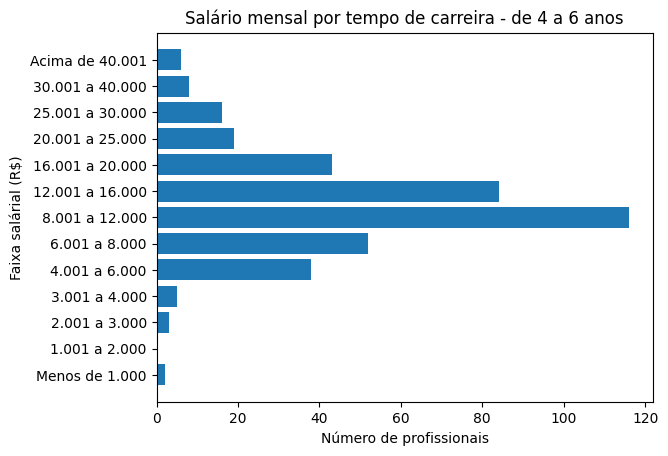

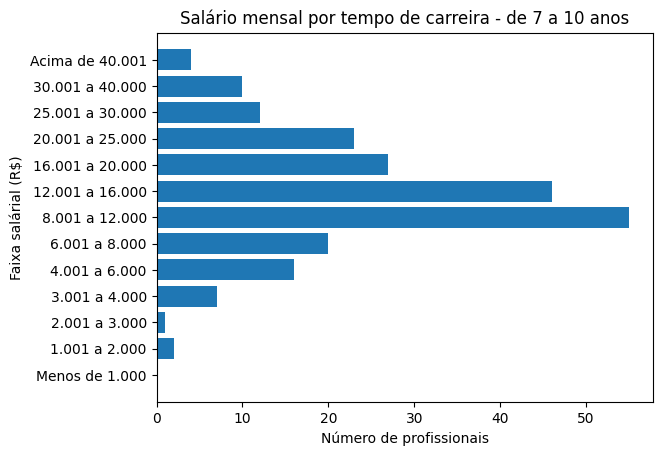

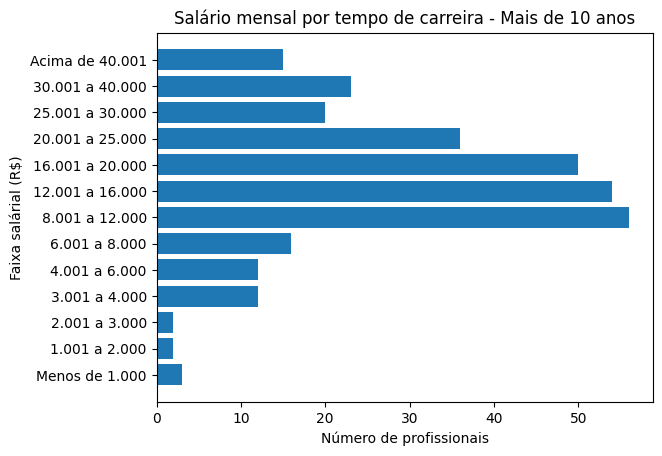

In [78]:
for tempo in lista_tempo_carreira:
  df_tempo_carreira_salarios_grouped = df_tempo_carreira_salarios[df_tempo_carreira_salarios["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] == tempo].groupby("('P2_h ', 'Faixa salarial')").count()

  df_tempo_carreira_salarios_grouped = df_tempo_carreira_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_tempo_carreira_salarios_grouped["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial (R$)')
  plt.title(f'Salário mensal por tempo de carreira - {tempo}')
  plt.show()

In [79]:
tempo_matrix = (df_tempo_carreira_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts().unstack().fillna(0))
df_hm_tempo = pd.DataFrame(tempo_matrix, index = faixas_ordenadas,
                  columns = lista_tempo_carreira)

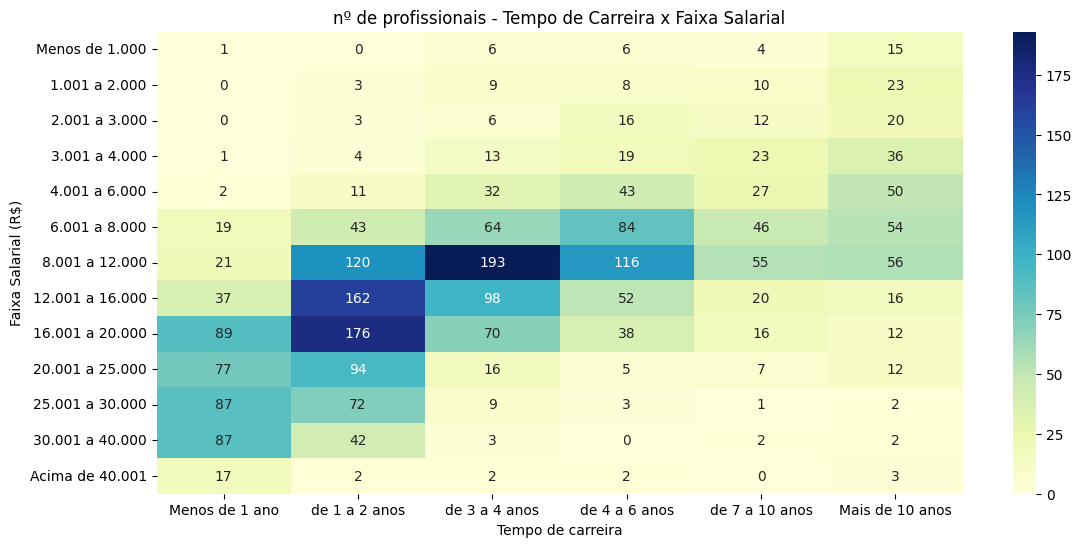

In [80]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_tempo.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels)

# plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])

plt.title('nº de profissionais - Tempo de Carreira x Faixa Salarial')
plt.xlabel('Tempo de carreira')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

In [81]:
tempo_matrix_p = tempo_matrix.copy()

for tempo in lista_tempo_carreira :

  tempo_matrix_p[tempo] = tempo_matrix_p[tempo]*100/df_tempo_carreira_salarios["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts()[tempo]

df_hm_tempo_p = pd.DataFrame(tempo_matrix_p , index = faixas_ordenadas,
                  columns = lista_tempo_carreira)

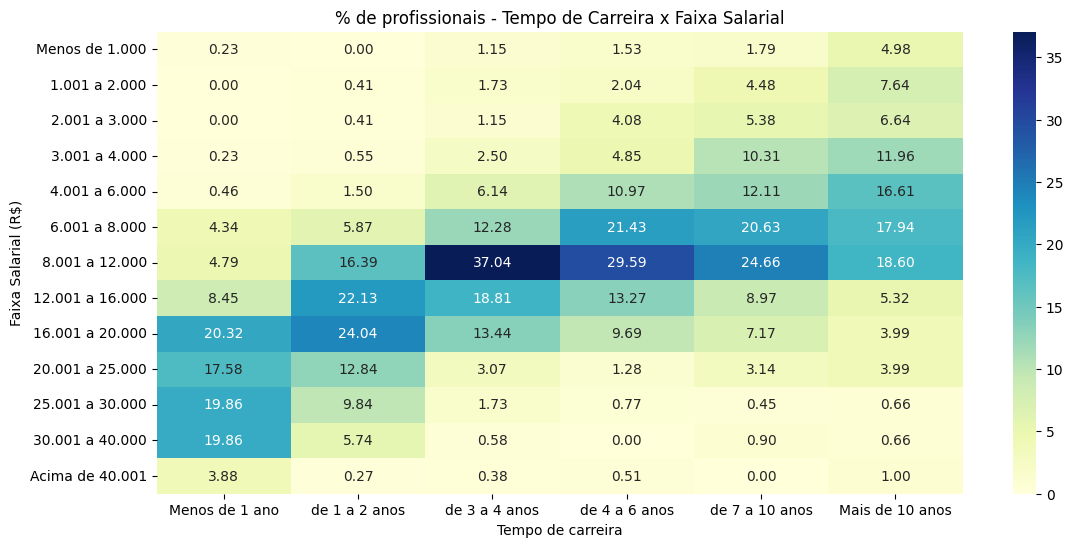

In [94]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_tempo_p.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.2f', yticklabels = labels)

plt.title('% de profissionais - Tempo de Carreira x Faixa Salarial')
plt.xlabel('Tempo de carreira')
plt.ylabel('Faixa Salarial (R$)')
plt.show()